In [1]:
import numpy as np
import pandas as pd

# Data

CO2 Concentration Data

Target Variable:
- co2: Measured concentration of CO₂ (in parts per million, ppm) at time t.

Observed Regressors:
- people_t: The number of people present in the room at time t.
- door_t: Binary variable indicating the status of the door at time t.
  - 1 = door is open
  - 0 = door is closed
- window_t: Binary variable indicating the status of the window at time t.
  - 1 = window is open
  - 0 = window is closed

Description:
This dataset contains information on CO₂ concentration levels (ppm) within a room,
based on the number of people present and the status of the door and window at each recorded time t.

In [2]:
data = pd.read_csv('data8.csv', sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    1000 non-null   object
 1   co2     1000 non-null   object
 2   people  1000 non-null   int64 
 3   door    1000 non-null   int64 
 4   window  1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [24]:
data.head()

,time,co2,people,door,window
0,2024-01-01 00:00:00,"395,5407183284845",0,0,0
1,2024-01-01 01:00:00,"398,2897719090259",0,0,0
2,2024-01-01 02:00:00,"413,1414533333378",1,0,0
3,2024-01-01 03:00:00,"396,50427905451346",0,0,0
4,2024-01-01 04:00:00,"398,1365196427504",0,0,0


## Elaboration data

- è stata rimossa la colonna 'time' in quanto non necessaria per il modello.
- è stata convertita òa colonna 'co2' in un tipo numerico (float) sostituendo le virgole con i punti.

In [4]:
# Create a new dataframe by dropping the 'time' column
new_data = data.drop('time', axis=1)

# Convert 'co2' column to numeric, replacing commas with periods
new_data['co2'] = new_data['co2'].str.replace(',', '.', regex=False).astype(float)

# Display the info of the new dataframe to confirm data types
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     1000 non-null   float64
 1   people  1000 non-null   int64  
 2   door    1000 non-null   int64  
 3   window  1000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 31.4 KB


## Data split

è stato suddiviso il dataset in set di training e test (X_train, X_test, y_train, y_test) utilizzando train_test_split ( libreria sklean )

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Define the features (X) and the target (y)
# Assuming 'co2' is the target variable
X = new_data.drop('co2', axis=1)
y = new_data['co2']

# Set a random seed for reproducibility
seed = 42

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (700, 3)
Shape of X_test: (300, 3)
Shape of y_train: (700,)
Shape of y_test: (300,)


# Random Forest

- è stato inizializzato e addestrato un modello RandomForestRegressor, sono state effettuate le previsioni sul set di test;
- sono state calcolate le metriche di valutazione (MSE, R-squared, RMSE).
- sono state rappresentate le features del modello per ordine di importanza. Forest.

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
# Using the same random state as before
model = RandomForestRegressor(criterion="squared_error", n_estimators=300, random_state=seed)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Modello Random Forest costruito e addestrato con successo.")

Modello Random Forest costruito e addestrato con successo.


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 15.336342665211196
R-squared: 0.8230660060274773


In [9]:

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.9161642796505864


In [27]:
# Get the feature importances from the trained model
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a pandas Series for better visualization
importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the importances in descending order
sorted_importance_series = importance_series.sort_values(ascending=False)

# Display the sorted feature importances
print("Feature Importances:")
print(sorted_importance_series)

Feature Importances:
people    0.992907
window    0.005477
door      0.001616
dtype: float64


#  modello XGBoost

- Dopo aver installato la libreria xgboost e inizializzato e addestrato il modello xgb_model, sono state effettuate le previsioni sul test set con il modello addestrato.
- Calcolate le metriche di valutazione (MSE, R-squared, RMSE) per xgb_model.
- Calcolata la feature importance per il modello xgb_model,

In [11]:
!pip install xgboost

In [12]:
import xgboost as xgb

# Initialize the XGBoost Regressor model
# You can adjust the hyperparameters here
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.1, random_state=seed)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

print("Modello XGBoost costruito e addestrato con successo.")

Modello XGBoost costruito e addestrato con successo.


In [13]:
#from sklearn.metrics import mean_squared_error, r2_score
#import numpy as np

# Make predictions on the test set using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Mean Squared Error (MSE) for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate R-squared for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate Root Mean Squared Error (RMSE) for XGBoost
rmse_xgb = np.sqrt(mse_xgb)

# Display the results for XGBoost
print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")
print(f"XGBoost Root Mean Squared Error (RMSE): {rmse_xgb}")

XGBoost Mean Squared Error (MSE): 15.311886974879458
XGBoost R-squared: 0.8233481491081457
XGBoost Root Mean Squared Error (RMSE): 3.9130406303639957


In [14]:
# Get the feature importances from the trained XGBoost model
xgb_feature_importances = xgb_model.feature_importances_

# Get the names of the features (using X.columns from the training data)
feature_names = X.columns

# Create a pandas Series for better visualization
xgb_importance_series = pd.Series(xgb_feature_importances, index=feature_names)

# Sort the importances in descending order
sorted_xgb_importance_series = xgb_importance_series.sort_values(ascending=False)

# Display the sorted feature importances for XGBoost
print("XGBoost Feature Importances:")
print(sorted_xgb_importance_series)

XGBoost Feature Importances:
people    0.988805
window    0.010013
door      0.001182
dtype: float32


# Predict

In modo esemplificativo sono stati utilizzati entrambi i modelli addestrati (Random Forest e XGBoost) per fare una previsione del valore di CO2 per un nuovo punto dati specifico.

In [15]:
# Define the specific scenario
people_value = 3
window_value = 1
door_value = 1

# Create a DataFrame for the new data point, ensuring column names match the training data
new_data_point = pd.DataFrame({
    'people': [people_value],
    'door': [door_value],
    'window': [window_value]
})

# Make prediction using the Random Forest model
predicted_co2_rf = model.predict(new_data_point)

# Make prediction using the XGBoost model
predicted_co2_xgb = xgb_model.predict(new_data_point)

# Display the predictions
print(f"Predicted CO2 (Random Forest): {predicted_co2_rf[0]:.3f}")
print(f"Predicted CO2 (XGBoost): {predicted_co2_xgb[0]:.3f}")

Predicted CO2 (Random Forest): 433.042
Predicted CO2 (XGBoost): 430.315


# SHAP analysis

In [16]:
!pip install shap

- installato e importato la libreria shap.
- creato uno SHAP Explainer (TreeExplainer) per il modello XGBoost.
- calcolato i valori SHAP per il set di test.
- generato e visualizzato i grafici SHAP (summary plot e dependence plot) per

In [17]:
import shap

In [18]:
# Initialize the SHAP TreeExplainer
explainer = shap.TreeExplainer(xgb_model)

In [19]:
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

Se si guarda ai diagrammi si può osservare come la feature 'people' ha l'impatto maggiore sulle previsioni del modello xgb_model, confermando quanto già visto con le feature importances standard. Le feature 'window' e 'door' hanno un impatto molto minore.

Guardando il summary_plot possiamo osservare come per la feature people, i punti rossi alti valori di people ( valori SHAP positivi ) indica che un maggior numero di persone contribuisce maggiormente all'aumento di co2 nella stanza. I punti in blu ( valori SHAP negativi ) si trovano a sinistra del grafico, indica che un minor numero di persone tende a diminuire il valore previsto per la co2. Questo ha perfettamente senso confermando che più persone ci sono nell'ambiente, maggiore sarà il livello di co2 registrato.

Nel secondo grafico ( SHAP dependence plot per people )  viene mostrata la relazione tra il valore della feature ('people' sull'asse X) e il suo impatto SHAP ('SHAP value for people' sull'asse Y).

Ogni punto sul grafico rappresenta un'istanza nel set di test.
L'asse X mostra il valore effettivo della feature 'people' per quell'istanza.
L'asse Y mostra il valore SHAP per la feature 'people' per quell'istanza.

Dal grafico di dipendenza per 'people', possiamo vedere una relazione quasi lineare e positiva: all'aumentare del numero di persone (sull'asse X), il valore SHAP per 'people' tende ad aumentare (sull'asse Y). Questo conferma che un maggior numero di persone ha un impatto positivo (aumenta) sulla previsione del livello di CO2.

l'analisi SHAP conferma che il numero di persone è il driver principale nella previsione dei livelli di CO2 da parte del modello, e mostra chiaramente la relazione positiva tra il numero di persone e il livello di CO2 previsto. Le altre feature ('window' e 'door') hanno un impatto molto minore e meno consistente sulle previsioni.

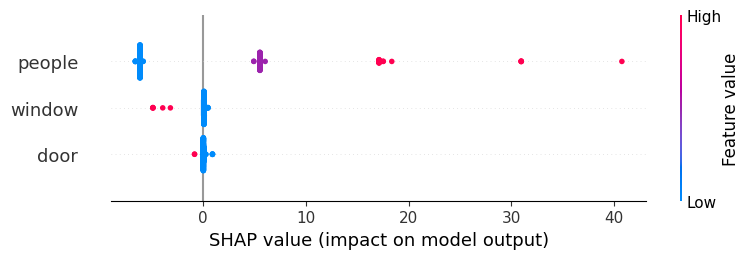

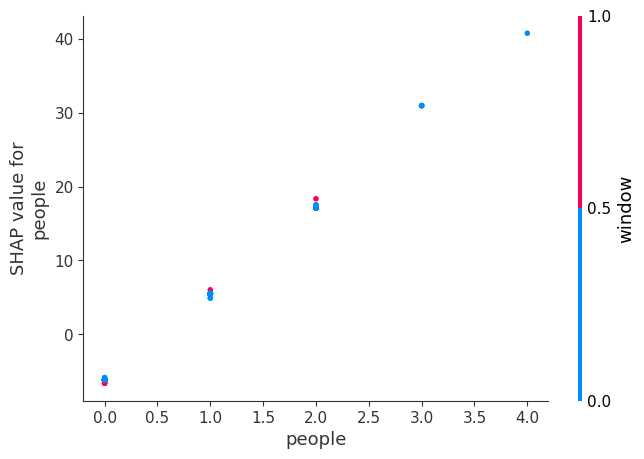

In [20]:
# Generate the SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Get the index of the feature with the highest importance (likely 'people')
# Assuming 'people' is the first column based on previous output, confirm with X_test.columns if needed
people_feature_index = X_test.columns.get_loc('people')

# Generate the SHAP dependence plot for the 'people' feature
shap.dependence_plot(people_feature_index, shap_values, X_test, display_features=X_test)